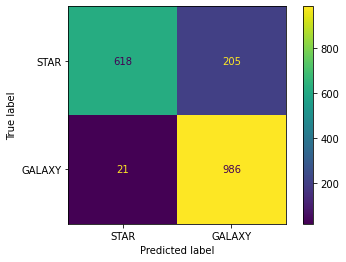

Accuracy: 0.88
F1: 0.85
Fold #1, Training Size: 8235, Validation Size: 915
Accuracy: 0.86
Fold #2, Training Size: 8235, Validation Size: 915
Accuracy: 0.85
Fold #3, Training Size: 8235, Validation Size: 915
Accuracy: 0.89
Fold #4, Training Size: 8235, Validation Size: 915
Accuracy: 0.90
Fold #5, Training Size: 8235, Validation Size: 915
Accuracy: 0.86
Fold #6, Training Size: 8235, Validation Size: 915
Accuracy: 0.88
Fold #7, Training Size: 8235, Validation Size: 915
Accuracy: 0.86
Fold #8, Training Size: 8235, Validation Size: 915
Accuracy: 0.86
Fold #9, Training Size: 8235, Validation Size: 915
Accuracy: 0.87
Fold #10, Training Size: 8235, Validation Size: 915
Accuracy: 0.86


In [1]:
# <<<<<<< HEAD
# -*- coding: utf-8 -*-
"""
Created on Tue Nov  9 19:37:37 2021

@author: james
"""

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from csv import reader
from sklearn.svm import SVC

path = "."  #absolute or relative path to the folder containing the file. 
            #"." for current folder

filename_read = os.path.join(path, "skyserver - original.csv")    # Importing a csv file called skyserver which is our dataset
df = pd.read_csv(filename_read)  # Reading the csv file and saving it in the df variable

# df.set_value("STAR", "class", 1)
# df.set_value("GALAXY", "class", 2)
df = df.drop(df[df['class'] == 'QSO'].sample(frac=1.00).index)
df['class'] = df['class'].replace({'STAR': 1})
df['class'] = df['class'].replace({'GALAXY': 2})


#df = df.reindex(np.random.permutation(df.index))

df = df[['objid','ra','dec','u','g','r','i','z','run','rerun','camcol','field','specobjid','redshift','plate','mjd','fiberid','class']]

X = df.iloc[:, 0:17]     # X is selecting only the first 16 columns
y = df.iloc[:, 17]       # y is selecting the 17th column which is 'xxx'
#df = df.reindex(np.random.permutation(df.index))


X = X.values       # Converts the X variable from to a list of values which helps to make the train/test split easier (in the appropriate data form)
y = y.values       # Y is converted to a list of values


target_names = ['STAR', 'GALAXY']  # Names of the targets which we will use for labelling in our analysis output


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # X and y is split into training and testing data with test being 20%

#build a multiclass SVM 'ovo' for one-versus-one, and
#fit the data
svm = SVC(gamma='scale', decision_function_shape='ovo')  # Support Vector Machine is initialised 
svm.fit(X_train,y_train)  # SVM is applied to X_train and y_train

y_pred = svm.predict(X_test)    # y_pred calculates the multi_svm prediction on the testing data for X

labels = target_names   

cm = confusion_matrix(y_test, y_pred)  # Confusion matrix is created using the y_test and the calculated y_pred variable from the SVM

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()   
plt.show()  # Confusion matrix is displayed

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))   # Accuracy of the confusion matrix is outputted
print('F1: %.2f' % f1_score(y_test,y_pred))  # F1 score 

# Use 10-fold split
kf1 = KFold(10, shuffle=True)    # A kfold is created which will use a 5-fold split
fold1 = 1                      # Counter variable which will start from 1

# The data is split five ways, for each fold, the 
# Perceptron is trained, tested and evaluated for accuracy
for train_index, validate_index in kf1.split(X, y):          # A for loop which will go through each train and validate value and in the split of the X and y column 
    svm.fit(X[train_index],y[train_index])
    y_test = y[validate_index]    
    y_pred = svm.predict(X[validate_index])
    print(f"Fold #{fold1}, Training Size: {len(X[train_index])}, Validation Size: {len(X[validate_index])}")  # K fold is calculated from 1 to 5 alongside the accuracy of each of those
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    fold1 += 1